In [36]:
!pip install jiwer

  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

cligj 0.5.0 requires click<8,>=4.0, but you'll have click 8.1.3 which is incompatible.


In [5]:
import fastwer
import jiwer
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display
import pandas
import pytesseract
from pytesseract import Output
import cv2
from statistics import mean


pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [48]:
###### Load the image 
path = "../Tesseract training/data2012_300dpi/2012_1_UTM_E.jpg"

img = cv2.imread(path)
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
img = cv2.resize(img,(0,0),fx=1,fy=1)

In [49]:
###### OCR the image
####### Discussing the LSTM confidence returned

ocr = pytesseract.image_to_data(img,lang='por',output_type = Output.DATAFRAME, pandas_config=None)
ocr

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,207,47,-1.000000,NaN
1,2,1,1,0,0,0,36,8,164,28,-1.000000,NaN
2,3,1,1,1,0,0,36,8,164,28,-1.000000,NaN
3,4,1,1,1,1,0,36,8,164,28,-1.000000,NaN
4,5,1,1,1,1,1,36,8,164,28,92.179695,"287.524,00"


In [14]:
########### Calculating the average of the text block
avgs = []
confs = []
for index, row in ocr.iterrows():

    if row['word_num'] != 0:
        confs.append((row['conf'],index))
        
confs_dict = dict(confs)
confs_dict
        
avg_confs = mean(confs_dict.keys())
# avg_confs
# avgs.append(avg_confs)

min_conf_index = confs_dict[min(confs_dict.keys())]
min_conf_txt = ocr.loc[ocr.index[min_conf_index],'text']
min_conf_txt


'-'

In [54]:
########### Generalising it over the images ################
path = '../Tesseract training/data2012_300dpi/'

str_nb = ['UTM_N','UTM_E']
str_lngTxt = ['Classification', 'Company' , 'Address']
str_shortTxt = ['Datum','Fuse']
imgs_numbers = [f for f in os.listdir(path) if 'UTM' in f]
imgs_lngTxt = [f for f in os.listdir(path) if any(s in f for s in str_lngTxt)]
imgs_shortTxt = [f for f in os.listdir(path) if any(s in f for s in str_shortTxt)]


In [44]:
avgs_nbs = []
min_txt_nbs = []
empty_nb_count = 0
for f in imgs_numbers:
    path_img = path + f
    img = cv2.imread(path_img)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img = cv2.resize(img,(0,0),fx=1,fy=1)
    ocr = pytesseract.image_to_data(img,lang='por',output_type = Output.DATAFRAME, pandas_config=None)
    confs = []
    for index, row in ocr.iterrows():
        if row['word_num'] != 0:
            confs.append((row['conf'],index))
        
    confs_dict = dict(confs)
    try:
        if len(confs_dict) != 0:
            avg_confs = mean(confs_dict.keys())
            avgs_nbs.append(avg_confs)

            min_conf_index = confs_dict[min(confs_dict.keys())]
            min_conf_txt = ocr.loc[ocr.index[min_conf_index],'text']
            min_txt_nbs.append(min_conf_txt)
    except:
        empty_nb_count += 1  

In [61]:
len(avgs_nbs)

1867

In [67]:
import statistics
# print(avgs_nbs)
mean = statistics.mean(avgs_nbs)
median = statistics.median(avgs_nbs)
# mode = statistics.mode(avgs_nbs)
stdev = statistics.stdev(avgs_nbs)
avgs_nbs.sort()


print("Mean:", mean)
print("Median:", median)
# print("Mode:", mode)
print("Standard deviation:", stdev)

Mean: 87.89696644295661
Median: 91.472488
Standard deviation: 11.865761430870947


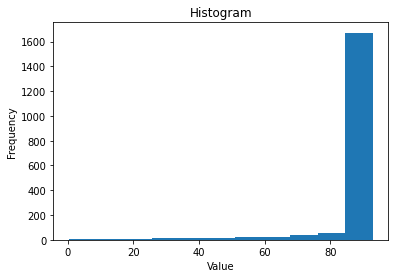

In [69]:
plt.hist(avgs_nbs, bins=11)

plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

In [72]:
avgs_nbs.sort()
q90 = np.percentile(avgs_nbs, 90)
q90

92.63579399999999

In [92]:
avgs_lngTxt = []
min_txt_lngTxt = []
empty_lngTxt_count = 0
scores = []
for f in imgs_lngTxt:
    path_img = path + f
    img = cv2.imread(path_img)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img = cv2.resize(img,(0,0),fx=1,fy=1)
    ocr = pytesseract.image_to_data(img,lang='por',output_type = Output.DATAFRAME, pandas_config=None)
    confs = []
    for index, row in ocr.iterrows():
        if row['word_num'] != 0:
            confs.append((row['conf'],index))
            
    confs_dict = dict(confs)
    
    try:
        if len(confs_dict) != 0:
            avg_confs = mean(confs_dict.keys())
            avgs_lngTxt.append(avg_confs)

            min_conf_index = confs_dict[min(confs_dict.keys())]
            min_conf_txt = ocr.loc[ocr.index[min_conf_index],'text']
            min_txt_lngTxt.append(min_conf_txt)
            
            scores.append((f, avg_confs))
    except:
        empty_lngTxt_count += 1
        
scores_dict = dict(scores)

KeyboardInterrupt: 

In [87]:
scores_dict

NameError: name 'scores_dict' is not defined

In [74]:
import statistics
# print(avgs_nbs)
mean = statistics.mean(avgs_lngTxt)
median = statistics.median(avgs_lngTxt)
# mode = statistics.mode(avgs_nbs)
stdev = statistics.stdev(avgs_lngTxt)
avgs_lngTxt.sort()


print("Mean:", mean)
print("Median:", median)
# print("Mode:", mode)
print("Standard deviation:", stdev)

Mean: 90.30591160239172
Median: 91.588852
Standard deviation: 3.1852339694629426


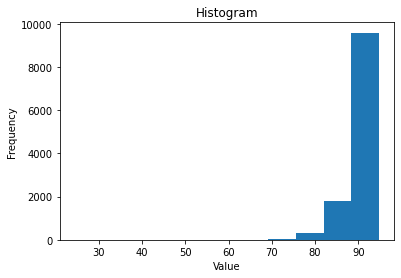

In [75]:
plt.hist(avgs_lngTxt, bins=11)

plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

In [76]:
avgs_lngTxt.sort()
q90 = np.percentile(avgs_lngTxt, 90)
q90

92.19925004

In [77]:
confs_dict

{93.185806: 4, 92.25810200000001: 5, 92.555687: 6, 92.714561: 7, 91.490868: 8}

In [ ]:
avgs_shortTxt = []
min_txt_shortTxt = []
empty_shortTxt_count = 0
for f in imgs_shortTxt:
    path_img = path + f
    img = cv2.imread(path_img)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img = cv2.resize(img,(0,0),fx=1,fy=1)
    ocr = pytesseract.image_to_data(img,lang='por',output_type = Output.DATAFRAME, pandas_config=None)
    confs = []
    for index, row in ocr.iterrows():
        if row['word_num'] != 0:
            confs.append((row['conf'],index))
        
    confs_dict = dict(confs)
    try:
        if len(confs_dict) != 0:
            avg_confs = mean(confs_dict.keys())
            avgs_shortTxt.append(avg_confs)

            min_conf_index = confs_dict[min(confs_dict.keys())]
            min_conf_txt = ocr.loc[ocr.index[min_conf_index],'text']
            min_txt_shortTxt.append(min_conf_txt)
    except:
        empty_shortTxt_count += 1

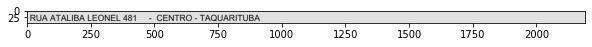

RUA ATALIBA LEONEL 481/ - CENTRO - TAQUARITUBA
Type the test in the image:RUA ATALIBA LEONEL 481  - CENTRO - TAQUARITUBA
CER =  2.1739
WER =  22.2222


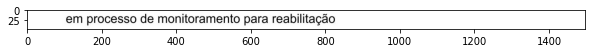

em processo de monitoramento para reabilitação
Type the test in the image:em processo de monitoramento para reabilitação
CER =  0.0
WER =  0.0


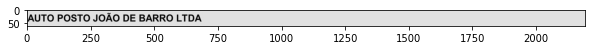

AUTO POSTO JOÃO DE BARRO LTDA
Type the test in the image:AUTO POSTO JOÃO DE BARRO LTDA
CER =  0.0
WER =  0.0


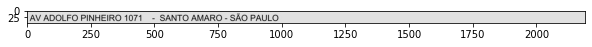

AV ADOLFO PINHEIRO 1071 - SANTO AMARO - SÃO PAULO
Type the test in the image:AV ADOLFO PINHEIRO 1071 - SANTO AMARO - SÃO PAULO
CER =  0.0
WER =  0.0


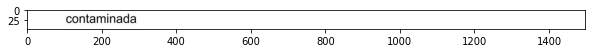

contaminada
Type the test in the image:contaminada
CER =  0.0
WER =  0.0


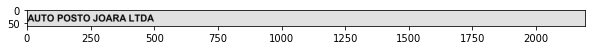

AUTO POSTO JOARA LTDA
Type the test in the image:AUTO POSTO JOARA LTDA
CER =  0.0
WER =  0.0


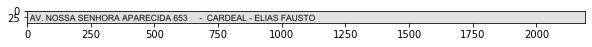

AV. NOSSA SENHORA APARECIDA 653 . - CARDEAL - ELIAS FAUSTO
Type the test in the image:AV. NOSSA SENHORA APARECIDA 653   - CARDEAL - ELIAS FAUSTO
CER =  1.7241
WER =  16.6667


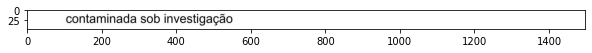

contaminada sob investigação
Type the test in the image:contaminada sob investigação
CER =  0.0
WER =  0.0


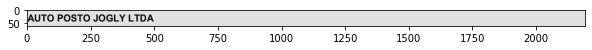

AUTO POSTO JOGLY LTDA
Type the test in the image:AUTO POSTO JOGLY LTDA
CER =  0.0
WER =  0.0


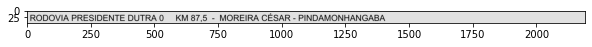

RODOVIA PRESIDENTE DUTRA O . KM 87,5 - MOREIRA CÉSAR - PINDAMONHANGABA
Type the test in the image:RODOVIA PRESIDENTE DUTRA 0   KM 87,5 - MOREIRA CÉSAR - PINDAMONHANGABA
CER =  2.8169
WER =  23.0769


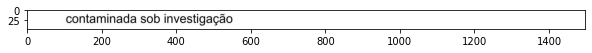

contaminada sob investigação
Type the test in the image:contaminada sob investigação
CER =  0.0
WER =  0.0


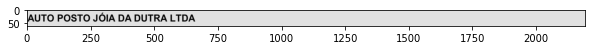

AUTO POSTO JÓIA DA DUTRA LTDA
Type the test in the image:AUTO POSTO JÓIA DA DUTRA LTDA
CER =  0.0
WER =  0.0


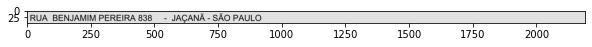

RUA BENJAMIM PEREIRA 838 - JAÇANÃ-SÃO PAULO
Type the test in the image:RUA BENJAMIM PEREIRA 838 - JAÇANÃ-SÃO PAULO
CER =  0.0
WER =  0.0


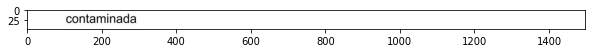

contaminada
Type the test in the image:contaminada
CER =  0.0
WER =  0.0


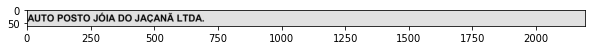

AUTO POSTO JÓIA DO JAÇANÃ LTDA.
Type the test in the image:AUTO POSTO JÓIA DO JAÇANÃ LTDA.
CER =  0.0
WER =  0.0


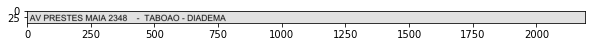

AV PRESTES MAIA 2348 - TABOAO - DIADEMA
Type the test in the image:AV PRESTES MAIA 2348 - TABOAO - DIADEMA
CER =  0.0
WER =  0.0


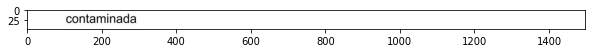

contaminada
Type the test in the image:contaminada
CER =  0.0
WER =  0.0


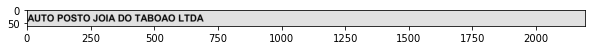

AUTO POSTO JOIA DO TABOAO LTDA
Type the test in the image:AUTO POSTO JOIA DO TABOAO LTDA
CER =  0.0
WER =  0.0


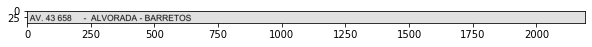

AV.43658 - ALVORADA-BARRETOS
Type the test in the image:AV.43 658 - ALVORADA-BARRETOS
CER =  3.4483
WER =  50.0


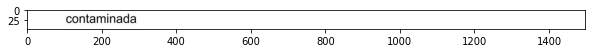

contaminada
Type the test in the image:contaminada
CER =  0.0
WER =  0.0


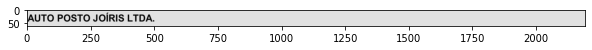

AUTO POSTO JOÍRIS LTDA.
Type the test in the image:AUTO POSTO JOÍRIS LTDA.
CER =  0.0
WER =  0.0


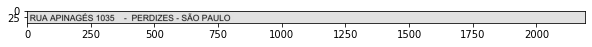

RUA APINAGÉS 1035 - PERDIZES - SÃO PAULO


KeyboardInterrupt: Interrupted by user

In [84]:
path_chosen_images = "../Tesseract training/data2012_300dpi/"

imgs_lngTxt = [f for f in os.listdir(path) if any(s in f for s in str_lngTxt)]
cers = []
wers = []

deletions_list = []
substitutions_list = []
insertions_list = []

for f in imgs_lngTxt: 
    ###### Load the image 
    path_img =  path_chosen_images + f

    img = cv2.imread(path_img)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img = cv2.resize(img,(0,0),fx=1,fy=1)

    plt.figure(figsize=(10,10))

    plt.imshow(img)
    plt.show()

    ###### OCR the image

    ocr = pytesseract.image_to_string(img,lang='por')
    ocr = ocr.strip('\n')
    print(ocr)
    
    ###### input the ground truth typed 

    ground_truth = input('Type the test in the image:')
    
    ##### Calculate CER 

    # Obtain Sentence-Level Character Error Rate (CER)
    cer = fastwer.score_sent(ocr, ground_truth, char_level=True)
    # wer = fastwer.score_sent(ocr, ground_truth)
    wer = fastwer.score_sent(ocr, ground_truth, char_level=False)
    # per_w = fastwer.score_sent(ocr, ground_truth, no_spaces=True)
    print('CER = ' ,cer)
    cers.append((f,cer))
    print('WER = ' ,wer)
    wers.append((f,wer))
    # Calculation of the number of deletion, substitution and insertion
    out = jiwer.compute_measures(ocr, ground_truth)
    deletions = out['deletions']
    deletions_list.append((f,deletions))
    substitutions = out['substitutions']
    substitutions_list.append((f,substitutions))
    insertions = out['insertions']
    insertions_list.append((f,insertions))
    
cer = dict(cers)
wer = dict(wers)
deletions = dict(deletions)
substitutions = dict(substitutions)
insertions = dict(insertions)

In [91]:
insertions_list




[('2012_1000_Address.jpg', 0),
 ('2012_1000_Classification.jpg', 0),
 ('2012_1000_Company Name.jpg', 0),
 ('2012_1001_Address.jpg', 0),
 ('2012_1001_Classification.jpg', 0),
 ('2012_1001_Company Name.jpg', 0),
 ('2012_1002_Address.jpg', 0),
 ('2012_1002_Classification.jpg', 0),
 ('2012_1002_Company Name.jpg', 0),
 ('2012_1003_Address.jpg', 0),
 ('2012_1003_Classification.jpg', 0),
 ('2012_1003_Company Name.jpg', 0),
 ('2012_1004_Address.jpg', 0),
 ('2012_1004_Classification.jpg', 0),
 ('2012_1004_Company Name.jpg', 0),
 ('2012_1005_Address.jpg', 0),
 ('2012_1005_Classification.jpg', 0),
 ('2012_1005_Company Name.jpg', 0),
 ('2012_1006_Address.jpg', 1),
 ('2012_1006_Classification.jpg', 0),
 ('2012_1006_Company Name.jpg', 0)]

In [82]:
out

WordOutput(references=[['RUA', 'ATALIBA', 'LEONEL', '481/', '-', 'CENTRO', '-', 'TAQUARITUBA']], hypotheses=[['RUA', 'ATALIBA', 'LEONEL', '481', '-', 'CENTRO', '-', 'TAQUARITUBA']], alignments=[[AlignmentChunk(type='equal', ref_start_idx=0, ref_end_idx=3, hyp_start_idx=0, hyp_end_idx=3), AlignmentChunk(type='substitute', ref_start_idx=3, ref_end_idx=4, hyp_start_idx=3, hyp_end_idx=4), AlignmentChunk(type='equal', ref_start_idx=4, ref_end_idx=8, hyp_start_idx=4, hyp_end_idx=8)]], wer=0.125, mer=0.125, wil=0.234375, wip=0.765625, hits=7, substitutions=1, insertions=0, deletions=0)

In [78]:
######## using JIWER

out = jiwer.process_words(ocr, ground_truth)
print(jiwer.visualize_alignment(out))

NameError: name 'ground_truth' is not defined

In [59]:
out = jiwer.compute_measures(ocr, ground_truth)
out['deletions']

1

In [98]:
deletions
substitutions

[]

In [79]:
num_substitutions = sum(1 for chunk in alignment['ops'][0] if chunk.type == 'substitute')

In [107]:
alignment['ops'][0][0].type

'equal'

In [109]:
alignment

{'wer': 0.3,
 'mer': 0.3,
 'wil': 0.4555555555555556,
 'wip': 0.5444444444444444,
 'hits': 7,
 'substitutions': 2,
 'deletions': 1,
 'insertions': 0,
 'ops': [[AlignmentChunk(type='equal', ref_start_idx=0, ref_end_idx=6, hyp_start_idx=0, hyp_end_idx=6),
   AlignmentChunk(type='substitute', ref_start_idx=6, ref_end_idx=7, hyp_start_idx=6, hyp_end_idx=7),
   AlignmentChunk(type='delete', ref_start_idx=7, ref_end_idx=8, hyp_start_idx=7, hyp_end_idx=7),
   AlignmentChunk(type='equal', ref_start_idx=8, ref_end_idx=9, hyp_start_idx=7, hyp_end_idx=8),
   AlignmentChunk(type='substitute', ref_start_idx=9, ref_end_idx=10, hyp_start_idx=8, hyp_end_idx=9)]],
 'truth': [['RUA',
   'DR.',
   'ELTON',
   'CÉZAR',
   '919',
   '-',
   '-',
   'AMARAIS',
   '-',
   'CAMPINAS']],
 'hypothesis': [['RUA',
   'DR.',
   'ELTON',
   'CÉZAR',
   '919',
   '-',
   'EMARAIS',
   '-',
   'CAMPINAS!']]}